In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [4]:
print(train_labels[6])

7


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

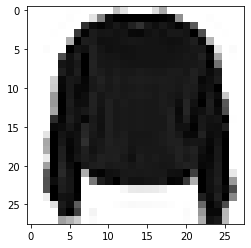

In [6]:
plt.imshow(train_images[7], cmap=plt.cm.binary)

In [7]:
print(train_images[7])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

In [8]:
train_images = train_images/255.0 
test_images = test_images/255.0

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"), #
    keras.layers.Dense(10, activation="softmax") #allows the last layer to represent probabilities
])

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.5041 - accuracy: 0.8241
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3815 - accuracy: 0.8622
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3424 - accuracy: 0.8756
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3168 - accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2988 - accuracy: 0.8904
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2833 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2712 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2604 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2520 - accuracy: 0.9060
Epoch 10/10
60

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
print("Tested Accuracy:", test_acc)

Tested Accuracy: 0.8799


In [14]:
prediction = model.predict(test_images)

In [15]:
print(prediction)

[[1.0787887e-06 6.0815113e-09 3.6650750e-08 ... 2.0249445e-02
  1.5989114e-06 9.7933859e-01]
 [6.0343074e-05 1.0835431e-12 9.9922419e-01 ... 5.2214846e-13
  1.4829365e-11 2.2479726e-14]
 [3.3662399e-08 1.0000000e+00 2.4663895e-12 ... 3.7917669e-23
  2.0756824e-14 1.5055175e-17]
 ...
 [4.7506623e-05 1.1123915e-09 3.7473767e-06 ... 2.5215984e-08
  9.9990165e-01 4.2035936e-13]
 [1.2090503e-07 9.9981147e-01 6.9464545e-10 ... 3.7843301e-17
  6.4384630e-11 4.1399306e-12]
 [5.6874842e-06 1.7416468e-07 2.3273171e-06 ... 1.9152573e-03
  1.4536006e-04 3.3699830e-06]]


In [16]:
print(class_names[np.argmax(prediction[0])])

Ankle boot


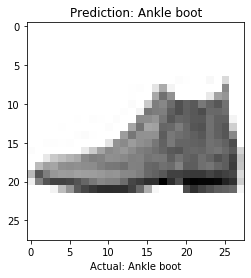

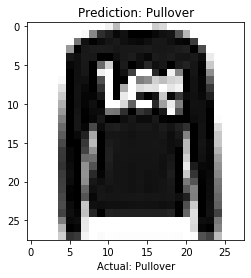

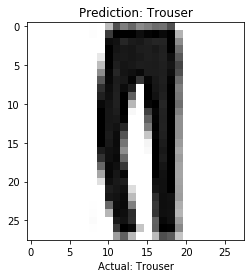

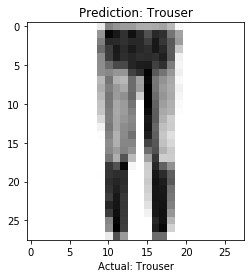

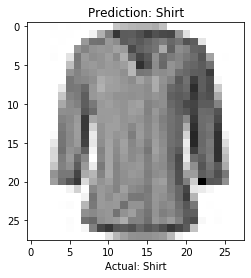

In [17]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()